#Init

In [269]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

plt.style.use('dark_background')

import seaborn as sb

from pylab import rcParams
rcParams['figure.figsize'] = 4, 3

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [270]:
!gdown --id 1Y7mlx-fxYERHAiwcukT-RaI2Ovzkml0y

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Y7mlx-fxYERHAiwcukT-RaI2Ovzkml0y
To: /content/titanic.zip
100% 22.5k/22.5k [00:00<00:00, 48.3MB/s]


In [271]:
!unzip '/content/titanic.zip'

Archive:  /content/titanic.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [272]:
df = pd.read_csv('/content/train.csv')

In [273]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S


#EDA



In [ ]:
df.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [ ]:
df.groupby(['Survived', 'Sex'], as_index=False, dropna=False).agg({'Age': ['mean', 'median', 'count'], 'PassengerId': 'count'}).sort_values(('Age', 'count'), ascending=False)

Survived     Sex        Age              PassengerId
                         mean median count       count
1        0    male  31.618056   29.0   360         468
2        1  female  28.847716   28.0   197         233
3        1    male  27.276022   28.0    93         109
0        0  female  25.046875   24.5    64          81

<Axes: >

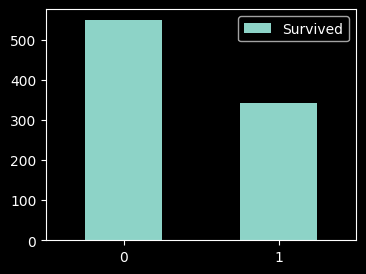

In [ ]:
df.groupby(['Survived'], as_index=False, dropna=False).agg({'Survived': 'count'}).sort_values('Survived', ascending=False).plot(kind='bar', rot=0)

In [ ]:
df.shape

(891, 12)

<Axes: xlabel='Sex', ylabel='count'>

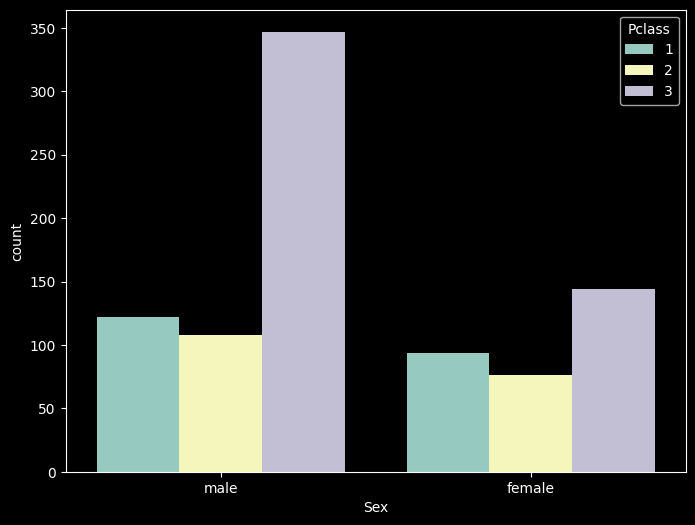

In [ ]:
plt.figure(figsize=(8, 6))
sb.countplot(x='Sex', data=df, hue='Pclass')

In [ ]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Age_nona       0.000000
dtype: float64

#ML

##Replace Str to Int
Меняем категориальные фичи на цифры

In [274]:
df['Age_nona'] = df['Age'].fillna(df['Age'].mean())

In [275]:
replace_sex = {'male': 1, 'female': 0}

df['Sex_num'] = df['Sex'].replace(replace_sex)

In [276]:
df['Embarked_nona'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

replace_embarked = {'S': 1, 'C': 0, 'Q': 2}

df['Embarked_num'] = df['Embarked_nona'].replace(replace_embarked)

In [277]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_nona,Sex_num,Embarked_nona,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1,S,1


## Train, Test

In [279]:
X = ['Age_nona', 'Pclass', 'SibSp', 'Parch', 'Sex_num', 'Embarked_num', 'Fare']
y = ['Survived']

In [280]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.5, random_state=42)

In [281]:
log_reg = LogisticRegression()

In [282]:
log_reg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [283]:
log_reg.score(X_test, y_test)

0.8004484304932735

In [284]:
survival = log_reg.predict(X_test)
print("OK ", sum(survival!=0))
print("NOT OK", sum(survival==0))

OK  160
NOT OK 286


## Confusion Matrix


array([[232,  35],
       [ 54, 125]])

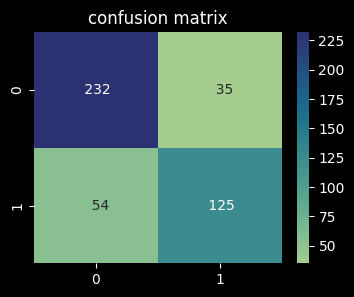

In [286]:
conf_mx = confusion_matrix(y_test, survival)

sb.heatmap(conf_mx, annot=True, fmt='4.0f', cmap='crest')
plt.title('confusion matrix', size=12)
conf_mx